In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings('ignore')

# Импорт данных

In [2]:
# функция импорта данных

def import_data(link, name):
    sheet_id = link
    sheet_name = name
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    name = pd.read_csv(url)
    return name

# импорт датафреймов

costs = import_data('1yvTfOtGWX7rHMrCWi8NSF4JTFbd7NvEv2SWCaiRpLIo', 'costs')
orders = import_data('1TVHwWxP8fkHJA1WzorQoetRDMi7vJwhQk8XNbak570I', 'orders_log')
visits = import_data('1Oqvg6GNwh8S8Y6IHx6X7HoPW8-5vBN9pNAU893SnrlU', 'visits_log')

Исследование **общей информации** каждого датафрейма и **содержащихся в нем данных** :

- датафрейм **'visits'**

In [3]:
display(visits.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 1:54:00,5,2017-07-01 1:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.7+ MB


- датафрейм **'orders'**

In [5]:
display(orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 0:10:00,17.00,10329302124590727494
1,2017-06-01 0:25:00,0.55,11627257723692907447
2,2017-06-01 0:27:00,0.37,17903680561304213844
3,2017-06-01 0:29:00,0.55,16109239769442553005
4,2017-06-01 7:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [7]:
orders['Buy Ts'].min()

'2017-06-01 0:10:00'

In [8]:
orders['Buy Ts'].max()

'2018-06-01 0:02:00'

Первая покупка состоялась 1 июня 2017 года. Последняя — 1 июня 2018.

- датафрейм **'costs'**

In [9]:
display(costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


**Вывод:**

В датафрейме 'visits' содержится информация о посещениях сайта Яндекс.Афиша. Включает в себя 359400 строк и 5 колонок:
- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

Датафрейм 'orders' содержит информацию о заказах. Включает в себя 50415 строк и 3 колонки:
- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

Датафрейм 'costs' содержит информацию о расходах на маркетинг. Включает в себя 2542 строки и 3 колонки:
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

В следующем разделе будет выполнено преобразование типов данных для продолжения исследования

# Предобработка данных

Датафреймы 'visits' и 'orders' в названиях колонках содержат буквы верхнего регистра. Для дальнейшего удобства **названия столбцов приведены к нижнему регистру**

In [11]:
visits.columns = visits.columns.str.lower()

In [12]:
orders.columns = orders.columns.str.lower()

Также некоторые колонки вышеуказанных датафреймов содержат в названии не очень удобные наименования. Также выполнено  **переименование столбцов**

In [13]:
visits = visits.rename(columns={'end ts':'end_ts'})
visits = visits.rename(columns={'source id':'source_id'})
visits = visits.rename(columns={'start ts':'start_ts'})
orders = orders.rename(columns={'buy ts':'buy_ts'})

## Приведение данных к нужным типам

Так как колонки, содержащие в себе информацию о дате, имеют тип object.

Данный тип данных не подходит для исследования, поэтому выполнено их **приведение к типу datetime**

In [14]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

В 'visits' **добавлены колонки**, содержащие:
- полную дату, 
- номер недели, 
- месяца и года начала сессии:

In [15]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] =visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


## Поиск дубликатов

In [16]:
def duplicates(df, title_df):
    print(f'Обнаружено дубликатов в датафрейме "{title_df}":', df.duplicated().sum())

duplicates(visits, 'visits')
duplicates(orders, 'orders')
duplicates(costs, 'costs')

Обнаружено дубликатов в датафрейме "visits": 0
Обнаружено дубликатов в датафрейме "orders": 0
Обнаружено дубликатов в датафрейме "costs": 0


**Вывод**:

Датафреймы 'visits' и 'orders' в названиях колонок содержали заглавные буквы. Для удобства они были приведены к нижнему регистру.

Колонки переименованы для дальнейшего удобства.

Колонки, содержащие информацию о датах, приведены к типу datetime.

Чтобы посчитать недельное и месячное использование, в датафрейме 'visits' в отдельные столбцы выделены год, месяц и неделя, а также полная дата.

Дубликаты также не обнаружены

# Исследовательский анализ данных

## Продуктовые метрики

Исследовательский анализ начат с оценки пользовательской активности. Для этого сгруппированы данные по уникальным пользователям и рассчитаны **DAU, WAU и MAU** -  количество уникальных пользователей в день, в неделю и в месяц, соответственно. Также необходимо изучить как изменяются данные показатели с течением времени

In [17]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = (visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}))
mau = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}))

In [18]:
print('Среднее количество уникальных пользователей в день:', int(dau.mean()))
print('Среднее количество уникальных пользователей в неделю:', int(wau.mean()))
print('Среднее количество уникальных пользователей в месяц:', int(mau.mean()))

Среднее количество уникальных пользователей в день: 907
Среднее количество уникальных пользователей в неделю: 5716
Среднее количество уникальных пользователей в месяц: 23228


Text(0.5, 0, 'Дата')

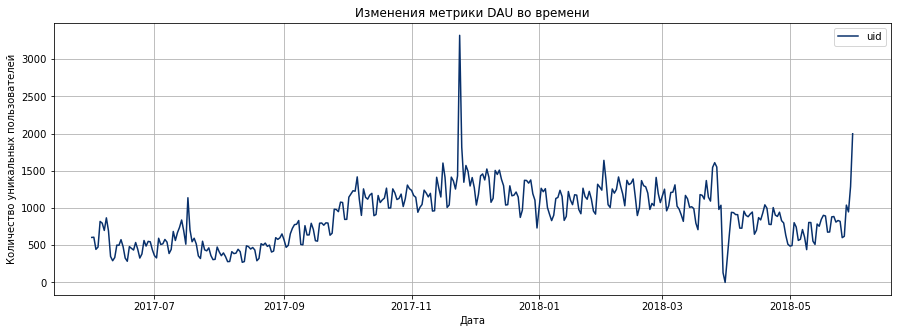

In [19]:
dau.plot(y = 'uid', 
         figsize = (15, 5),
         grid = True,
         cmap = 'Blues_r',
         title = 'Изменения метрики DAU во времени')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Дата')

Text(0.5, 0, 'Дата')

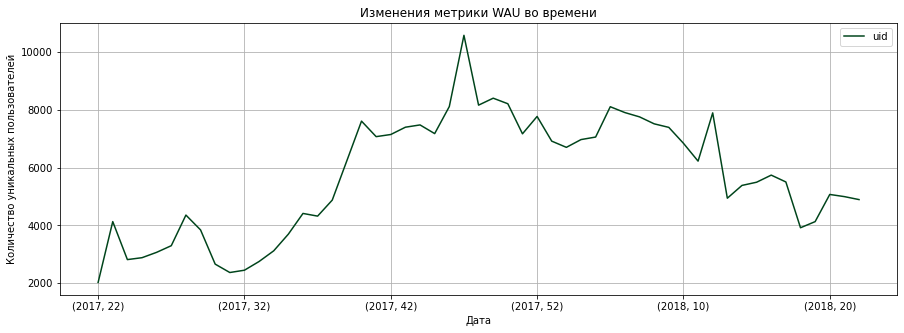

In [20]:
wau.plot(y = 'uid', 
         figsize = (15, 5),
         grid = True,
         cmap = 'Greens_r',
         title = 'Изменения метрики WAU во времени')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Дата')

Text(0.5, 0, 'Дата')

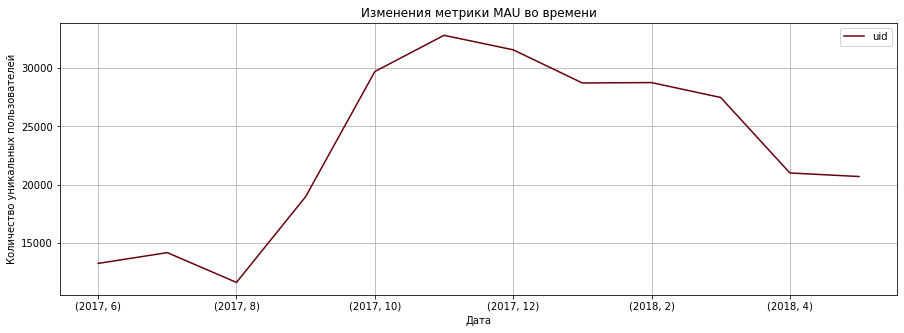

In [21]:
mau.plot(y = 'uid', 
         figsize = (15, 5),
         grid = True,
         cmap = 'Reds_r',
         title = 'Изменения метрики MAU во времени')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Дата')

Выжным показателем является **количество сессий пользователей на сайте в день**, т.к. это показатель регулярности использования сайта.

В сводной таблице 'sessions_per_user' отображено общее количество пользователей за день и количество уникальных пользователей в день. Колонки с данными показателями переименованы в 'amount_sessions' и 'amount_users', соответственно. 

Чтобы рассчитать интересующую метрику - количество сессий в день, общее количество пользователей поделено на количество уникальных пользователей. Колонка с количеством сессий на пользователя будет называется 'amount_sessions_per_user'

In [22]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['amount_sessions', 'amount_users']
sessions_per_user['amount_sessions_per_user'] = sessions_per_user['amount_sessions'] / sessions_per_user['amount_users']

In [23]:
sessions_per_user.head()

,amount_sessions,amount_users,amount_sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [24]:
print('Минимальное количество пользовательских сессий в день:', round(sessions_per_user['amount_sessions_per_user'].min(),2))
print('Среднее количество пользовательских сессий в день:', round(sessions_per_user['amount_sessions_per_user'].mean(),2))
print('Максимальное количество пользовательских сессий в день:', round(sessions_per_user['amount_sessions_per_user'].max(),2))

Минимальное количество пользовательских сессий в день: 1.0
Среднее количество пользовательских сессий в день: 1.08
Максимальное количество пользовательских сессий в день: 1.22


Text(0.5, 0, 'Дата')

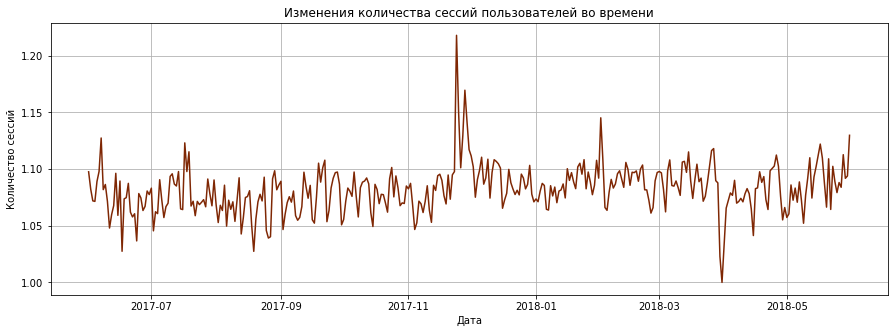

In [25]:
sessions_per_user['amount_sessions_per_user'].plot(y = 'uid', 
                                        figsize = (15, 5),
                                        grid = True,
                                        cmap = 'Oranges_r',
                                        title = 'Изменения количества сессий пользователей во времени')
plt.ylabel('Количество сессий')
plt.xlabel('Дата')

Далее рассчитана **продолжительность сессии** пользователя на сайте **в секундах** в колонке 'session_duration'. Для этого из даты и времени окончания сессии вычтена дата и время начала:

In [26]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [27]:
print('Средняя продолжительность сессии:', round(visits['session_duration'].mean(),2))

Средняя продолжительность сессии: 643.51


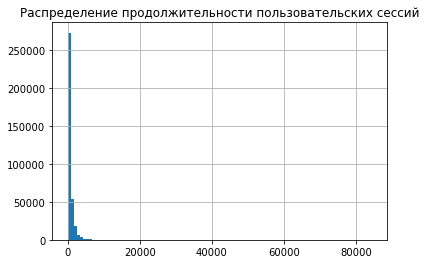

In [28]:
visits['session_duration'].hist(bins=100)
plt.title('Распределение продолжительности пользовательских сессий');

Исходя из графика, можно сделать вывод, что **распределение продолжительности сессии не похоже на нормальное**. Следующим шагом является расчет **моды**, чтобы узнать типичную продолжительность пользовательской сессии:

In [29]:
visits['session_duration'].mode()

0    60
dtype: int64

Таким образом, мода продолжительности пользовательской сессии 60 секунд

Важной частью данного проекта является исследование изменения **количества пользователей, совершивших покупку впервые**, по месяцам. Для этого необходимо выполнить **когортный анализ**. 

**Когорта** — группа людей, объединённых одним и тем же событием, произошедшим в определённый период времени

Выводы из когортного анализа могут стать причиной изменений в продукте и процессах, он позволяет выдвинуть новые гипотезы. Но это метод ретроспективного анализа — он отвечает на вопрос, как пользователи вели себя в прошлом. Поэтому его редко применяют для прогнозирования поведения пользователей, на которое в будущем повлияют внешние факторы

Одним из важнейших показателей когортного анализа является **Retention Rate**. Он показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

В данном случае когортой будут пользователи, впервые зашедшие на сайт в один месяц. 

В новом датафрейме 'first_activity_date' сгруппированы одинаковые идентификаторы пользователей и для каждого найдена самая ранняя дата начала сессии. 

Методом astype() значения приведены к типу 'datetime64[M]', где [M] означает размерность временной метки - месяц.

In [30]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_month = first_activity_date.astype('datetime64[M]')
first_activity_month.name = 'first_activity_month'
first_activity_month.head()

uid
1,03179E+19   2017-11-01
1,34335E+19   2017-10-01
1,53988E+16   2018-01-01
1,57554E+16   2018-03-01
1,90308E+15   2017-11-01
Name: first_activity_month, dtype: datetime64[ns]

Методом join() объединены датафрейм visits и Series 'first_activity_month' по столбцу 'uid':

In [31]:
visits = visits.join(first_activity_month, on='uid')

visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-01


В новой колонке 'activity_month' датафрейма 'visits' значения столбца 'start_ts' приведены к типу 'datetime64[M]':

In [32]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')

Чтобы рассчитать **'время жизни' когорты** из месяца входа на сайт пользователем ('activity_date') нужно вычесть месяц появления когорты ('first_activity_date').

Данные в новой колонке преобразованы в число месяцев, прошедших между датами. Для этого cohort_lifetime нужно разделить на константу np.timedelta64(1, 'M') чтобы узнать, сколько величин длиной в 1 месяц содержится в cohort_lifetime.

Вследствие того, что константа np.timedelta64(1,'M') представляет собой среднюю длину месяца в году, получились дробные числа. С помощью метода round() значения столбца округлены и приведены их к целочисленному типу методом astype('int').

In [33]:
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month'])

visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')

visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [34]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-01,2017-12-01,0


Данные сгруппированы по когорте и 'lifetime' в датафрейме 'cohorts'. Для каждой когорты посчитано количество активных пользователей на определённый месяц 'жизни' когорты.

In [35]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц. Для этого необходимо найти исходное количество пользователей в когорте. Возьму их число на нулевом месяце.

Дополнительно выполнено переименование столбца 'uid' в 'cohort_users'

In [36]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Данные по когортам объединены с исходным количеством пользователей в когорте:

In [37]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


И, наконец, рассчитан Retention Rate путем деления количество активных пользователей в каждом месяце на исходное число пользователей в когорте:

In [38]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [39]:
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


В сводной таблице 'retention' будет отображен Retention Rate по месяцам по каждой из когорт. Также таблица является основанием для построения **тепловой карты**. 

Тепловая карта — визуализация таблицы, где ячейки со значениями меняют цвет в зависимости от их близости к максимальному или минимальному значению. 

In [40]:
retention = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


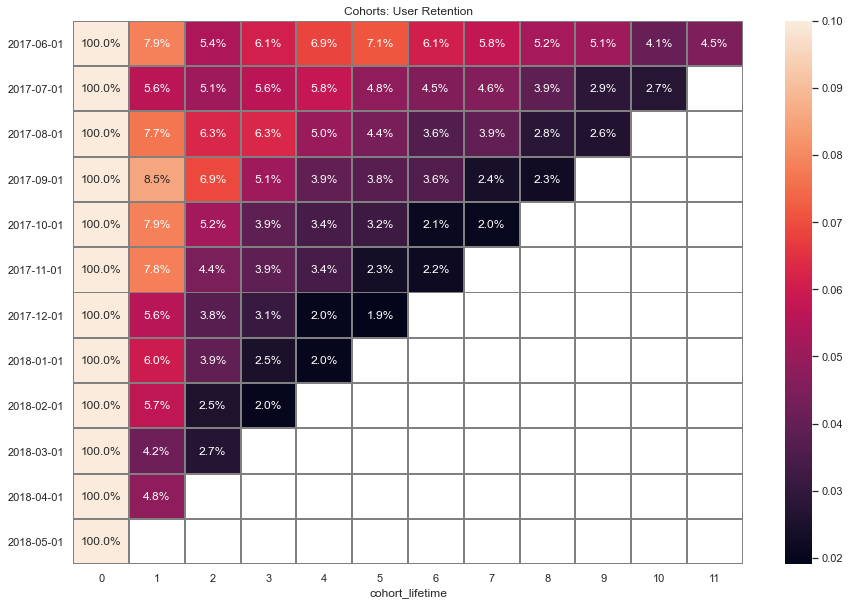

In [41]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: User Retention')
retention.index = [str(x)[0:10] for x in retention.index]
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1); 

Рассчитан **средний Retention Rate на второй месяц 'жизни' когорт**:

In [42]:
round((cohorts[cohorts['cohort_lifetime'] == 2][['retention']].mean()*100),2)

retention    4.63
dtype: float64

**Вывод**:

Метрика DAU показывает количество ежедневных активных пользователей. Она демонстрирует, сколько пользователей зашло в приложение за день. Соответственно, WAU – это еженедельные активные пользователи. А MAU — это уникальные пользователи, которые посещают приложение хотя бы раз в месяц. Уникальность пользователей определяется по ID или логину.
В нашем случае показатели имеют весьма неплохие значения:
- DAU - 907 пользователей;
- WAU - 5716 пользователей;
- MAU - 23228 пользователей.

Посколько анализируемый период составляет год, на визуальном отображении можно проанализировать как менялись вышеуказанные показатели.
DAU был сравнительно низким в летние месяцы 2017 года. Возможно это связано с тем, что традиционно это сезон отпусков, соответственно, проводится меньше мероприятий, на которые можно купить билет на Яндекс.Афише. Зато с наступлением осени начинается подъем количества уникальных ежедневных пользователей. Пик приходится на декабрь 2017, что несомненно указывает на увеличение посещений  к новогодним праздникам: люди покупают билеты в подарок, а также для себя - обычно к праздникам проводятся очень масштабные мероприятия. После декабря метрика держится примерно на одном уровне. Однако, нельзя не заметить резкий спад в апреле 2018 года. Возможно, возникла проблема на сайте или проводились технические работы.
WAU и MAU показывают примерно ту же картину. Однако, из-за укрупнения временных отрезков, спад в апреле 2018 не так очевиден.

В рамках продуктовых метрик нельзя забывать про рассчет среднего количества сессий пользователей в день, так как он отображает регулярность использования сайта. Рассчитывается он как остаток от деления количества сессий на количество пользователей за какой-то промежуток времени. В среднем этот показатель составляет 1.08, что означает, что стандартный пользователь заходит на сайт больше 1 раза. Также график изменения вышеуказанной метрики во времени имеет пик в декабре 2017, что говорит о том, что пользователи возвращались на сайт Яндекс.Афиши не один раз за месяц.

Также была рассчитана продолжительность сессии пользователя в секундах. График, постоенный на основании рассчетов показал, что распределение продолжительности сессии не похоже на нормальное, поэтому была рассчитана мода для того, чтобы узнать типичную продолжительность пользовательской сессии. По моде она составила 60 секунд, однако среднеарифметическое составило уже 644 секунды, что больше похоже на реальность: пользователь в течение 10 минут выбирает интересное ему событие и приобретает билет.

В данном разделе также был осуществлен когортный анализ. В частности, для рассчета Retention Rate, который показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. По тепловой карте, построенной для более удобного анализа, можно сказать, что Retention Rate в первый месяц убывает по когортам с течением времени: для когорты пользователей, пришедших в июне 2017 года Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших в июле — уже 5,6%. Следует отметить, что за 6 месяцев коэффициент удержания упал на 2,3%. Это говорит, о том, что около половины пользователей не очень хотят возвращаться на сайт. Возможно, стоит обратить внимание на оформление сайта или проверить технические аспекты.

### Метрики электронной коммерции 

В данном проекте за исследуется предприятие онлайн-торговли, т.е. процесс покупки и продажи происходит с помощью электронных средств. Для эффективной деятельности необходимо отслеживать ключевые метрики электронной коммерции для отслеживания состояния бизнеса.

В данном разделе будут проанализированы такие показатели, как:
- среднее количество времени от первого посещения сайта до покупки;
- среднее количество покупок на одного покупателя;
- средний чек;
- LTV - сумма денег, которую клиент приносит в среднем со всех своих покупок.

Для исследования **времени между входом на сайт и покупкой**, методом join() объедины данные о заказах ('orders') и данные о первой сессии пользователя на сайте Series 'first_activity_date'. 

Чтобы избежать путаницы, новый столбец переименован на 'first_ts'

In [43]:
orders = orders.join(first_activity_date, on='uid')
orders = orders.rename(columns={'start_ts':'first_ts'})
orders.head()

,buy_ts,revenue,uid,first_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Добавлена новая колонка 'time_before_purchase', в которой рассчитана **разница в минутах между первым посещением сайта и совершением покупки**:

In [44]:
orders['time_before_purchase'] = orders['buy_ts']-orders['first_ts']
orders['time_before_purchase'] = orders['time_before_purchase']/ np.timedelta64(1, 'm')

<AxesSubplot:>

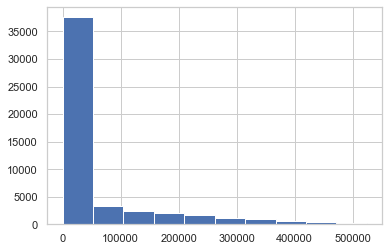

In [45]:
orders['time_before_purchase'].hist()

In [46]:
round(orders['time_before_purchase'].mode(),2)

0    1.0
dtype: float64

Далее рассчитано **количество покупок на одного покупателя, в том числе среднее значение за полгода** применяя когортный анализ.

Для этих целей использован датафрейм orders. 

Для начала данные сгруппированы по уникальному идентификатору пользователя и для каждого пользователя найдена самая ранняя дата заказа:

In [47]:
first_order_month = orders.groupby(['uid'])['buy_ts'].min()
first_order_month = first_order_month.astype('datetime64[M]')
first_order_month.name = 'first_order_month'
first_order_month.head()

uid
10000837700716403746   2017-06-01
10000997030965831953   2018-01-01
10001199569370567060   2017-11-01
10002243978166172255   2017-10-01
10003351403065971701   2017-11-01
Name: first_order_month, dtype: datetime64[ns]

Полученный датафрейм 'first_order_month' объединен с датафреймом с 'orders' по столбцу 'uid':

In [48]:
orders = orders.join(first_order_month, on='uid')
orders.head()

,buy_ts,revenue,uid,first_ts,time_before_purchase,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01


В новом столбце 'buy_month' помещены значения колонки 'buy_ts', приведенные к типу 'datetime64[M]':

In [49]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

В колонке 'cohort_lifetime' будет содержаться разница между месяцем очередного заказа и месяцем первого заказа. Значения данного столбца будут являться 'временем жизни' каждой когорты

In [50]:
orders['cohort_lifetime'] = (orders['buy_month'] - orders['first_order_month'])
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

,buy_ts,revenue,uid,first_ts,time_before_purchase,first_order_month,buy_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,0


В новом датафрейме 'orders_per_user' сгруппированы данные по когорте и 'времени жизни' каждой когорты. 

Также рассчитано количество заказов пользователей по каждой когорте в каждом ее 'времени жизни' и количество пользователей, сделавших заказ. Колонки названы 'amount_orders' и 'amount_users', соответственно.

В столбце 'orders_per_user' содержатся значения о количестве заказов на 1 пользователя из каждой когорты.

In [51]:
orders_per_user = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid': ['count','nunique']})
orders_per_user.columns = ['amount_orders', 'amount_users']
orders_per_user['orders_per_user'] = orders_per_user['amount_orders'] / orders_per_user['amount_users']
orders_per_user = orders_per_user.reset_index()
orders_per_user.head()

,first_order_month,cohort_lifetime,amount_orders,amount_users,orders_per_user
0,2017-06-01,0,2354,2023,1.163618
1,2017-06-01,1,177,61,2.901639
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,226,54,4.185185
4,2017-06-01,4,292,88,3.318182


С помощью метода pivot_table создан датафрейм 'purchases_amount', в котором отображены все когорты в разрезе каждого месяца их 'жизни' и количество заказов на 1 пользователя:

In [52]:
purchases_amount = orders_per_user.pivot_table(index='first_order_month',
                                               values='orders_per_user',
                                               columns='cohort_lifetime',
                                               aggfunc='sum')
purchases_amount = round(purchases_amount,2)

In [53]:
purchases_amount

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,2.90,3.48,4.19,3.32,3.25,4.45,3.70,3.66,3.40,2.13,1.62
2017-07-01,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,NaN
2017-08-01,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,NaN,NaN
2017-09-01,1.14,1.68,1.61,2.22,1.29,1.70,1.64,1.51,1.42,NaN,NaN,NaN
2017-10-01,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,NaN,NaN,NaN,NaN
2017-11-01,1.18,1.79,1.52,1.99,1.68,1.23,1.65,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,1.85,1.96,1.85,1.72,1.67,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.12,1.96,1.92,1.49,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,1.88,1.43,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Среднее значение количества заказов за полгода:

In [54]:
round((purchases_amount[5].mean()),2)

1.91

**Средний чек** - это товарооборот в денежном выражении, приведённый к количеству заказов за определенный период, 

Средний чек, не смотря на относительную простоту рассчета, является комплексным показателем, демонстрирующим насколько продуман ассортимент товаров и услуг, насколько грамотен мерчандайзинг и маркетинговая стратегия. Рассчитывается как сумма всех совершенных клиентами покупок за определенный период времени, деленная на количество заказов за тот же период.

В новом датафрейме 'avg_oder' сгруппированы данные по времени заказа:

In [55]:
avg_oder = orders.groupby('buy_month').agg({'revenue': 'sum', 'uid': 'nunique'})

In [56]:
avg_oder.head()

,revenue,uid
buy_month,,
2017-06-01,9557.49,2023
2017-07-01,12539.47,1984
2017-08-01,8758.78,1472
2017-09-01,18345.51,2750
2017-10-01,27987.70,4675


В колонке 'revenue_per_user' рассчитан средний чек покупателя, путем деления суммы заказа на количество заказов:

In [57]:
avg_oder['revenue_per_user'] = avg_oder['revenue']/avg_oder['uid']

В сводной таблице отображены **изменения среднего чека** по месяцу совершения покупки

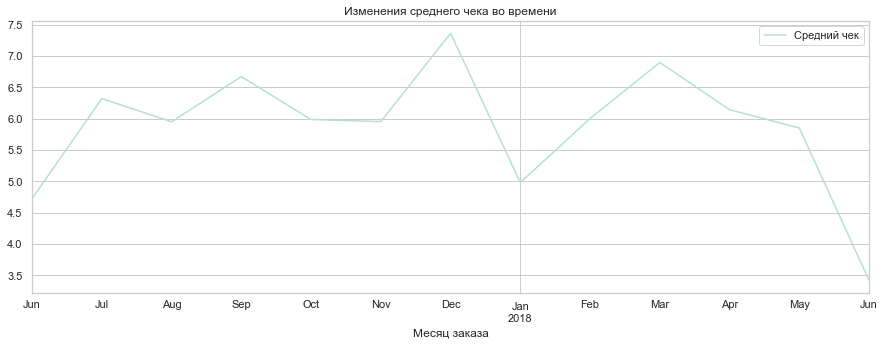

In [58]:
avg_oder.pivot_table(index='buy_month',
                     values='revenue_per_user',
                     aggfunc='mean').plot(figsize = (15, 5),
                                          grid = True,
                                          cmap = 'Pastel2')
plt.xlabel('Месяц заказа')
plt.title('Изменения среднего чека во времени')
plt.legend(['Средний чек']);

**LTV**  — «пожизненная» ценность клиента. Это — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. При расчёте LTV обычно обращаются к валовой прибыли с клиента за период.

В новом датафрейме 'new_buyers' рассчитано количество новых уникальных покупателей в каждом месяце

In [59]:
new_buyers = (orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
new_buyers.columns = ['first_order_month', 'new_buyers']
new_buyers.head()

,first_order_month,new_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


В датафрейме 'cohorts_rev' данные о заказах сгруппированы по месяцу первой покупки и месяцу каждого заказа в датафрейме 'cohorts_rev'. Также просуммирована выручка

In [60]:
cohorts_rev = orders.groupby(['first_order_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts_rev.head())

  first_order_month  buy_month  revenue
0        2017-06-01 2017-06-01  9557.49
1        2017-06-01 2017-07-01   981.82
2        2017-06-01 2017-08-01   885.34
3        2017-06-01 2017-09-01  1931.30
4        2017-06-01 2017-10-01  2068.58


Так как с точки зрения когортного анализа LTV — накопительная метрика, в таблицу 'cohorts_rev' добавлены данные о том, сколько людей первый раз совершили покупку в каждый месяц, путем создания датафрейма 'total_orders':

In [61]:
total_orders = pd.merge(new_buyers, cohorts_rev, on='first_order_month')
print(total_orders.head())

  first_order_month  new_buyers  buy_month  revenue
0        2017-06-01        2023 2017-06-01  9557.49
1        2017-06-01        2023 2017-07-01   981.82
2        2017-06-01        2023 2017-08-01   885.34
3        2017-06-01        2023 2017-09-01  1931.30
4        2017-06-01        2023 2017-10-01  2068.58


Поскольку LTV считают из валовой прибыли, значит, нужно ее найти, умножив выручку на маржинальность. 

Так как LTV является относительным показателем, его удобнее смотреть по 'времени жизни' когорты.

Маржинальность сервиса — 100%, поэтому показатель margin_rate = 1.

In [62]:
margin_rate = 1

total_orders['proceeds'] = total_orders['revenue'] * margin_rate
total_orders['cohort_lifetime'] = (total_orders['buy_month'] - total_orders['first_order_month'])/np.timedelta64(1, 'M')
total_orders['cohort_lifetime'] = total_orders['cohort_lifetime'].round().astype('int')
print(total_orders.head())

  first_order_month  new_buyers  buy_month  revenue  proceeds  cohort_lifetime
0        2017-06-01        2023 2017-06-01  9557.49   9557.49                0
1        2017-06-01        2023 2017-07-01   981.82    981.82                1
2        2017-06-01        2023 2017-08-01   885.34    885.34                2
3        2017-06-01        2023 2017-09-01  1931.30   1931.30                3
4        2017-06-01        2023 2017-10-01  2068.58   2068.58                4


Настало время найти непосредственно LTV. Для этого валовая прибыль когорт за каждый месяц поделена на общее число пользователей в каждой когорте. 

Результат выведен в виде сводной таблицы 'ltv':

In [63]:
total_orders['ltv'] = total_orders['proceeds'] / total_orders['new_buyers']

ltv = total_orders.pivot_table(index='first_order_month', 
                               columns='cohort_lifetime', 
                               values='ltv', 
                               aggfunc='mean')
ltv = round(ltv.cumsum(axis=1),2)
ltv.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


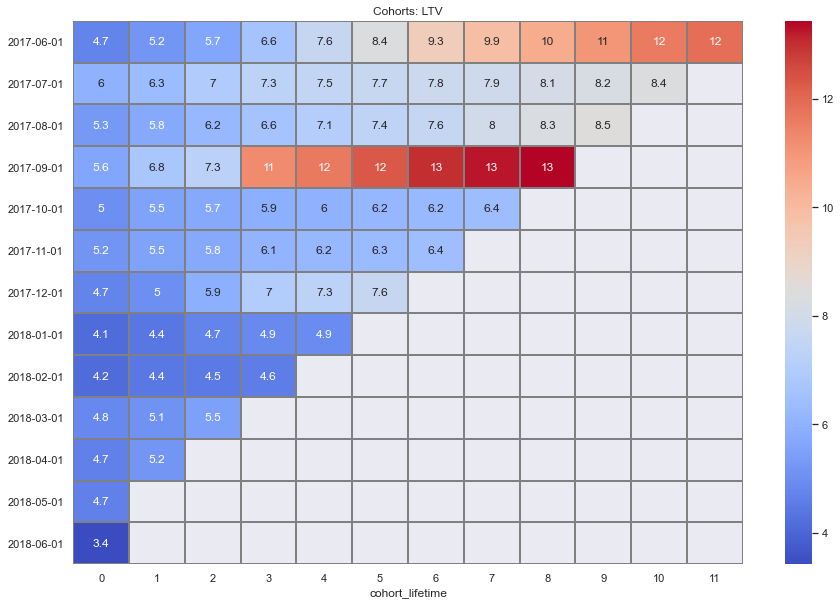

In [64]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: LTV')
ltv.index = [str(x)[0:10] for x in ltv.index]
sns.heatmap(ltv, annot=True, linewidths=1, linecolor='grey', cmap= 'coolwarm'); 

In [65]:
# среднее ltv на пятый месяц 'жизни' когорт

round(ltv[5].mean(),2)

7.97

**Вывод:**

В рамках метрик электронной коммерции был исследован такой показатель как время между входом на сайт и покупкой. Распределение данной метрики на графике также далеко от нормального. По моде стандарное время от захода на сайт и заказом составляет 1 минуту.

Для выявления количества покупок на одного покупателя был выполнен когортный анализ, в результате которого было установлено, что когорта пользователей в первый месяц делает около 1 заказа на человека, но с увеличением 'возраста' конкретной когорты, количество заказов резко возрастает.
При анализе 6 месяцев 'жизни' когорт было выявлено, что на 1 пользователя приходится в среднем около 2 заказов. Это означает, что пользователи удовлетворены первым заказом и возвращаются чтобы сделать последующие.

Следить только за количеством транзакций для оценки успеха бывает недостаточно. Очень полезно отслеживать изменение еще одной метрики электронной коммерции - среднего чека.
Средний чек — это метрика, за которой нужно следить время от времени. В целом, на графике изменения данной метрики во времени можно наблюдать скачки в июле, сентябре и, естественно, в декабре 2017 года. Данные изменения могут быть результатом проведения крупных мероприятий, на которые высокая стоимость билетов или увеличением их количества. Для повышения среднего чека можно добавить категории рекомендуемых товаров на страницу. Это заставит покупателей добавлять больше предметов в корзины. В электронной коммерции на рост показателя можно повлиять за счет:

- улучшения структуры, удобства пользования интернет-магазином;
- использования техник cross-sell (предложения дополнительных продуктов) и up-sell (предложения более дорогих продуктов)
- скидок и акций.

Некоторые клиенты изначально могут не приносить прибыль. И их привлечение может дорого стоить. С течением времени клиенты становятся более прибыльными. Другие могут стать прибыльными после определенного промежутка времени. Всегда не будет лишним убедиться, что жизненная ценность клиентов высока, наскотлько это возможно. Для этого используется метрика LTV. Как показывают исследования, существующие клиенты приносят на 67% больше денег, чем новые. Это также увеличит среднюю стоимость заказа, о которой говорилось выше. Стоит думать на перспективу и учитывать, сколько клиент будет тратить со временем. Поэтому метрика важна для отслеживания.

На тепловой карте можно заметить, что метрика LTV возрастает по мере увеличения 'жизни' когорт. Так, пользователи, впервые совершившие покупку в июне 2017 года уже через полгода  стали приностить вдвое больше денег: показатель LTV увеличился с 4.7 до 9.3. Особо стоит отметить когорту пользователей, сделавших покупку в сентябре 2017 года: уже на 3й месяц 'жизни' данной когорты LTV удволся с 5.6 до 11 у.е., что на треть больше чем средне значение по всем когортам за полгода 

### Маркетинговые метрики

В данном подразделе исследование начато с вычисления **распределения затрат по источникам, а также расчета общей суммы расходов на маркетинг**.

Для этого в датафрейме 'costs' создана колонка 'costs_month', в которой будет содержаться месяц и год проведения рекламной кампании:

In [66]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

Далее в датафрейме 'costs_sourses' данные сгруппированы так, чтобы затраты распределились по источникам и по датам рекламных кампаний:

In [67]:
costs_sourses = costs.pivot_table(index='costs_month', columns='source_id', values = 'costs', aggfunc = 'sum')

In [68]:
costs_sourses.head()

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


На графике отображена визуализация изменения вышеуказанных метрик во времени:

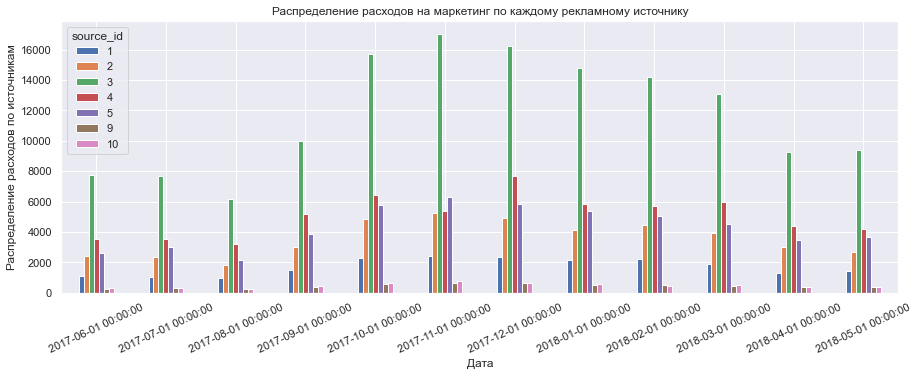

In [69]:
costs_sourses.plot(figsize = (15, 5), kind = 'bar', grid = True)
costs_sourses.index = [str(x)[0:10] for x in costs_sourses.index]
plt.title('Распределение расходов на маркетинг по каждому рекламному источнику')
plt.ylabel('Распределение расходов по источникам')
plt.xlabel('Дата')
plt.xticks(rotation=25);

In [70]:
print('Суммарные расходы на рекламные кампании:', costs['costs'].sum())

Суммарные расходы на рекламные кампании: 329131.62


Одной из важнейших маркетинговых метрик является **CAC** — стоимость привлечения клиента. Это сумма денег, в которую обходится новый клиент компании.

Перед непосредственным рассчетом САС выполны подготовительные рассчеты: создан датафрейм 'monthly_costs', в котором сгруппированы данные по месяцу проведения рекламных кампаний и просуммированы затраты по каждому из них

In [71]:
monthly_costs = costs.groupby('costs_month').sum()
monthly_costs.head()

,source_id,costs
costs_month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


В датафрейме 'cac' объедины 'total_orders' и ранеесозданный 'monthly_costs'.

САС - это частное от деления затрат на количество покупателей. Добавленв новая колонку 'cac' и рассчитан непосредственно сам показатель

In [72]:
cac = pd.merge(total_orders, monthly_costs, left_on='first_order_month', right_on='costs_month')
cac['cac'] = cac['costs'] / cac['new_buyers']

In [73]:
cac.head()

,first_order_month,new_buyers,buy_month,revenue,proceeds,cohort_lifetime,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,1020,18015.0,8.905091


Далее в датафрейме 'cac_pivot_table' расчитан средний CAC на одного покупателя для всего проекта и на графике отображено изменение метрики во времени:

In [74]:
cac_pivot_table = cac.pivot_table(index='first_order_month', values = 'cac', aggfunc = 'mean')

In [75]:
cac_pivot_table.head()

,cac
first_order_month,
2017-06-01,8.905091
2017-07-01,9.485486
2017-08-01,10.796015
2017-09-01,9.441654
2017-10-01,8.369327


В датафрейме 'wer' сгруппированы данные датафрейма 'visits' по уникальному номеру пользователя. Также с помощью метода first() найден для каждого пользователя первый рекламный источник. Дополнительно переименованы столбцы в 'uid' и 'first_id_source', соответственно

In [76]:
wer = visits.sort_values('start_ts').groupby(['uid'])['source_id'].first().reset_index()
wer.columns = 'uid', 'first_id_source'
wer.head()

,uid,first_id_source
0,"1,03179E+19",3
1,"1,34335E+19",5
2,"1,53988E+16",3
3,"1,57554E+16",4
4,"1,90308E+15",3


Вышеказанный датафрейм 'wer' присоединен к датафрейму 'orders' чтобы в новом датафрейме 'orders_source' каждому уникальному номеру пользователя соответствовал номер рекламного источника, из которого он пришел изначально

In [77]:
orders_source = pd.merge(orders, wer, on='uid')
orders_source.head()

,buy_ts,revenue,uid,first_ts,time_before_purchase,first_order_month,buy_month,cohort_lifetime,first_id_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,0,3


Данные датафрейма 'orders_source' сгруппированы по месяцу и по рекламному источнику, чтобы получить количество новых покупателей.
Дополнительно переименованы столбцы

In [78]:
new_new_buyers = (orders_source.groupby(['first_order_month', 'first_id_source']).agg({'uid': 'nunique'}).reset_index())
new_new_buyers.columns = ['first_order_month', 'source_id','new_buyers']
new_new_buyers.head()

,first_order_month,source_id,new_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Дополнительно сгруппированы данные по месяцу первого заказа, месяцу заказа и рекламному источнику для нахождения общей суммы прибыли для каждой когорты:

In [79]:
new_cohorts_rev = orders_source.groupby(['first_order_month', 'buy_month', 'first_id_source']).agg({'revenue': 'sum'}).reset_index()
new_cohorts_rev = new_cohorts_rev.rename(columns={'first_id_source':'source_id'})
new_cohorts_rev.head()

,first_order_month,buy_month,source_id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


Объединены 2 датафрейма 'new_new_buyers' и 'new_cohorts_rev'. В колонке 'ltv' рассчитана метрика LTV 

In [80]:
new_total_orders = pd.merge(new_new_buyers, new_cohorts_rev, on=['first_order_month', 'source_id'])
new_total_orders['ltv'] = new_total_orders['revenue'] / new_total_orders['new_buyers']
new_total_orders.head()

,first_order_month,source_id,new_buyers,buy_month,revenue,ltv
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,2.184105
2,2017-06-01,1,190,2017-08-01,419.43,2.207526
3,2017-06-01,1,190,2017-09-01,714.24,3.759158
4,2017-06-01,1,190,2017-10-01,811.20,4.269474


Маржинальность взята как 100%, поэтому margin_rate = 1. В колонке 'proceeds' рассчитана прибыль и время 'жизни' по каждой когорте

In [81]:
margin_rate = 1

new_total_orders['proceeds'] = new_total_orders['revenue'] * margin_rate
new_total_orders['cohort_lifetime'] = (new_total_orders['buy_month'] - new_total_orders['first_order_month'])/np.timedelta64(1, 'M')
new_total_orders['cohort_lifetime'] = new_total_orders['cohort_lifetime'].round().astype('int')

Данные датафрейма 'costs' сгруппированы по месяцу проведения рекламной компании и рекламному источнику, соответственно

In [82]:
monthly_costs_source = costs.groupby(['costs_month','source_id']).sum().reset_index()
monthly_costs_source.head()

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Объединены датафреймы 'new_total_orders' и 'monthly_costs_source'. Теперь имеются все данные для рассчета САС по каждому источнику

In [83]:
new_total_orders = new_total_orders.merge(monthly_costs_source, 
                                          left_on = ['first_order_month', 'source_id'], 
                                          right_on = ['costs_month', 'source_id'])
new_total_orders.head()

,first_order_month,source_id,new_buyers,buy_month,revenue,ltv,proceeds,cohort_lifetime,costs_month,costs
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,1378.70,0,2017-06-01,1125.61
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,414.98,1,2017-06-01,1125.61
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,419.43,2,2017-06-01,1125.61
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,714.24,3,2017-06-01,1125.61
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,811.20,4,2017-06-01,1125.61


Расчет непосредственно САС:

In [84]:
new_total_orders['cac'] = new_total_orders['costs'] / new_total_orders['new_buyers']
new_total_orders.head()

,first_order_month,source_id,new_buyers,buy_month,revenue,ltv,proceeds,cohort_lifetime,costs_month,costs,cac
0,2017-06-01,1,190,2017-06-01,1378.70,7.256316,1378.70,0,2017-06-01,1125.61,5.924263
1,2017-06-01,1,190,2017-07-01,414.98,2.184105,414.98,1,2017-06-01,1125.61,5.924263
2,2017-06-01,1,190,2017-08-01,419.43,2.207526,419.43,2,2017-06-01,1125.61,5.924263
3,2017-06-01,1,190,2017-09-01,714.24,3.759158,714.24,3,2017-06-01,1125.61,5.924263
4,2017-06-01,1,190,2017-10-01,811.20,4.269474,811.20,4,2017-06-01,1125.61,5.924263


Тепловые карты по каждому источнику:

In [85]:
# функция построения тепловой карты для CAC

def CAC(month_number):
    cac = new_total_orders.query(f'source_id == {month_number}').pivot_table(index='first_order_month', 
                                                                             columns='cohort_lifetime',
                                                                             values='cac', 
                                                                             aggfunc='mean')
    cac = round(cac.cumsum(axis=1),2)
    cac.fillna('')
    sns.set(style='darkgrid')
    plt.figure(figsize=(15, 7))
    plt.title(f'САС, Источник № {month_number}', fontdict={'size':20})
    cac.index = [str(x)[0:10] for x in cac.index]
    sns.heatmap(cac, annot=True, linewidths=1, linecolor='grey', cmap= 'winter'); 

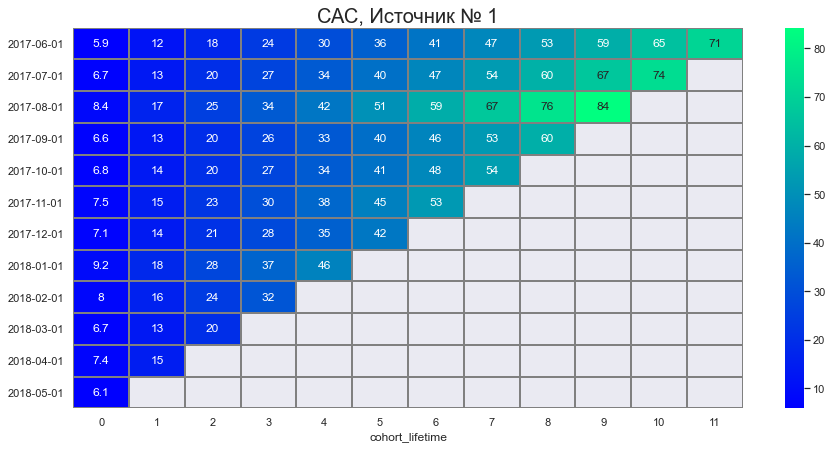

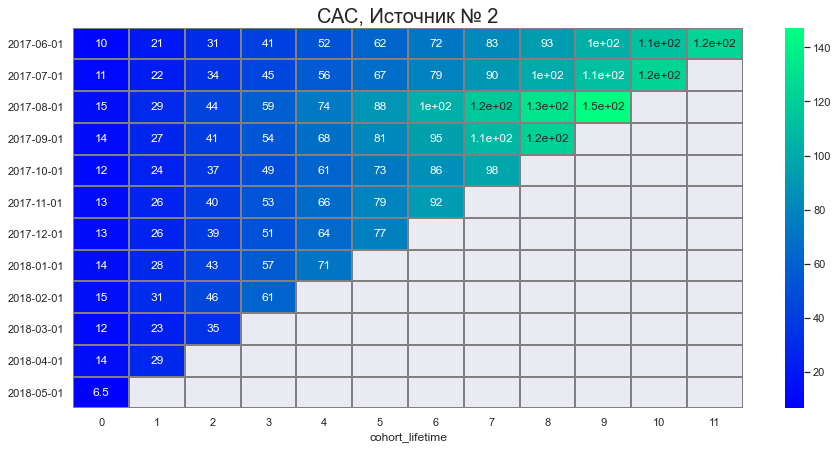

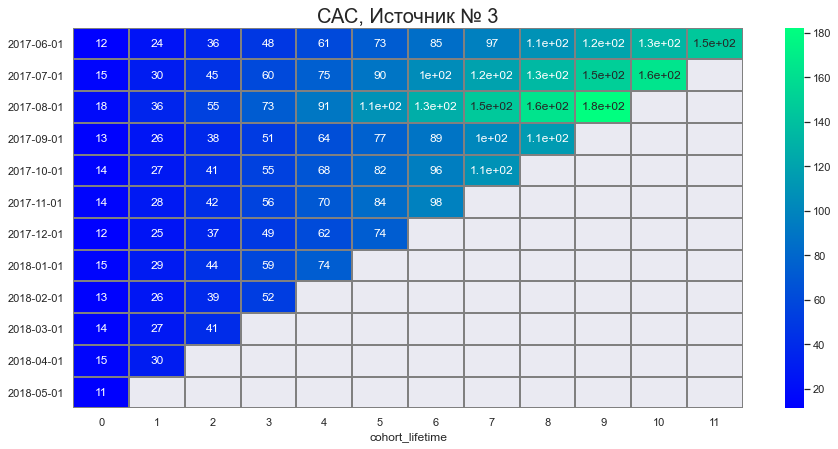

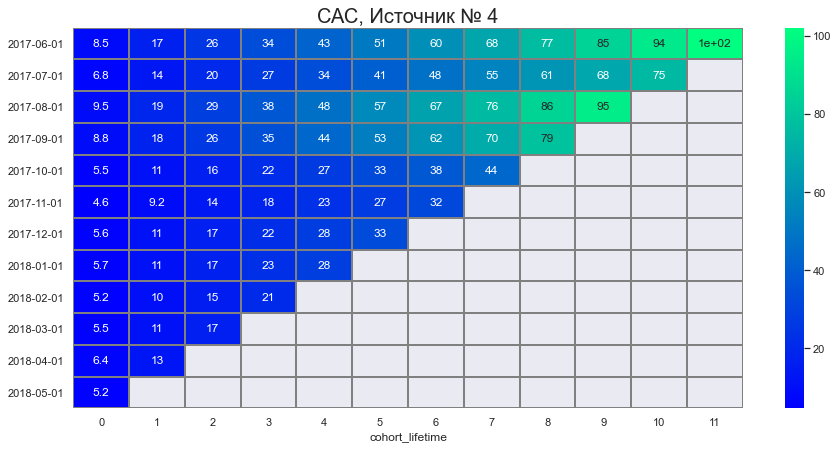

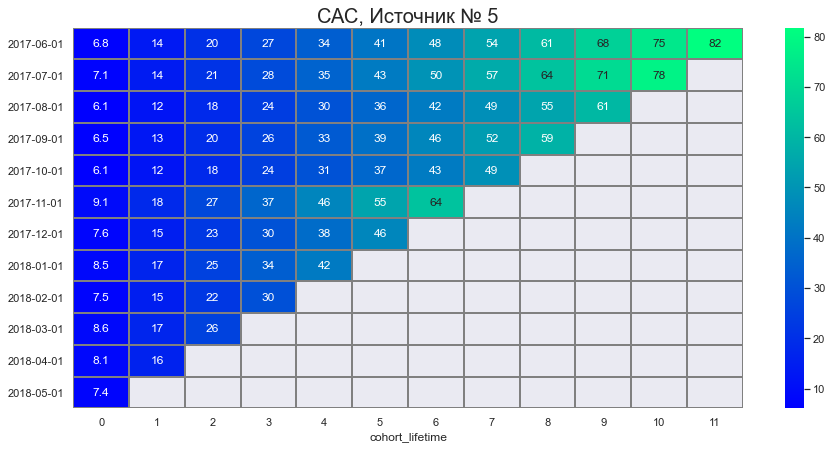

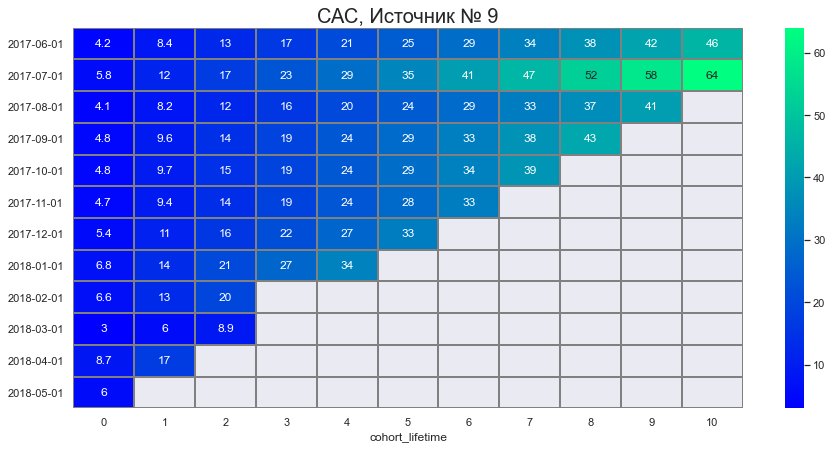

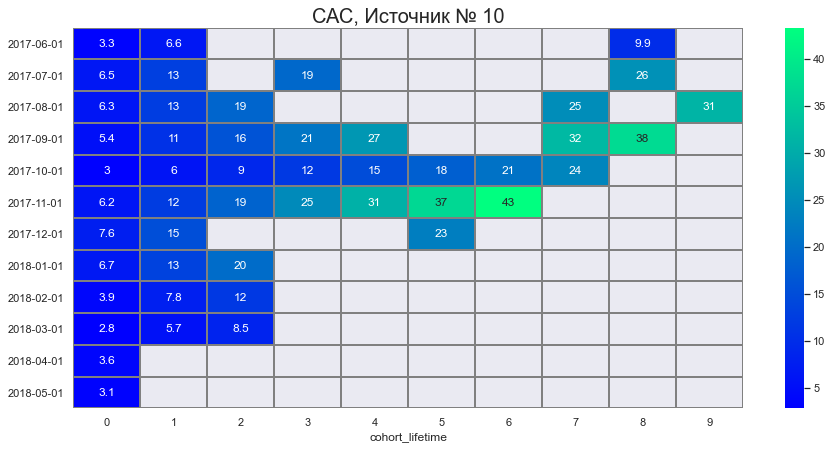

In [86]:
# в переменную cac_num сохранен список номеров источников, со значением CAC, не равным нулю

cac_num = new_total_orders.groupby('source_id')['cac'].mean().index

# вызов функции осуществлен для источников из вышеуказанного списка

for month in cac_num:
    CAC(month)

Еще одной немаловажной метрикой маркетингового анализа является **ROMI**. Этот показатель используется чтобы узнать когда вложения инвесторов окупятся.

Метрику проанализирована по когортам в разрезе источников.

Romi рассчитывется путем деления ltv на cac. Также для каждого источника построены тепловая карта

In [87]:
new_total_orders['romi'] = new_total_orders['ltv']/new_total_orders['cac']

In [88]:
def ROMI(month_number):
    romi = new_total_orders.query(f'source_id == {month_number}').pivot_table(index='first_order_month',
                                                                              columns='cohort_lifetime',
                                                                              values='romi', 
                                                                              aggfunc='mean')
    
    romi = round(romi.cumsum(axis=1),2)
    sns.set(style='whitegrid')
    plt.figure(figsize=(15, 7))
    plt.title(f'ROMI, Источник № {month_number}', fontdict={'size':20})
    romi.index = [str(x)[0:10] for x in romi.index]
    sns.heatmap(romi, annot=True, linewidths=1, linecolor='grey', cmap= 'Blues');

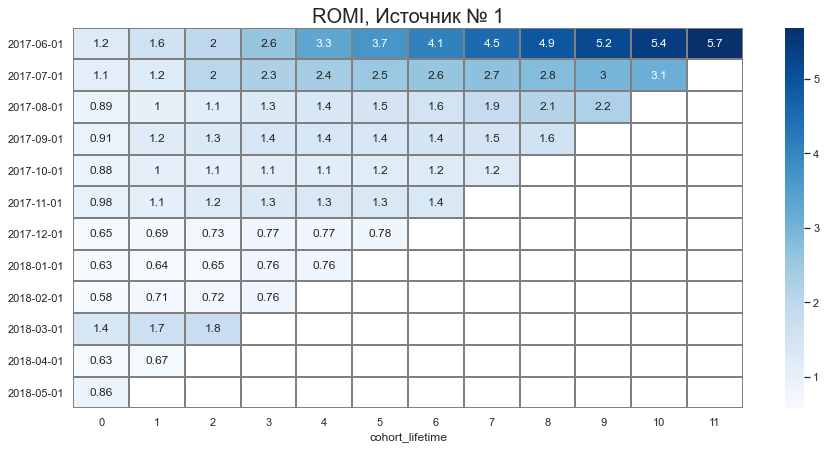

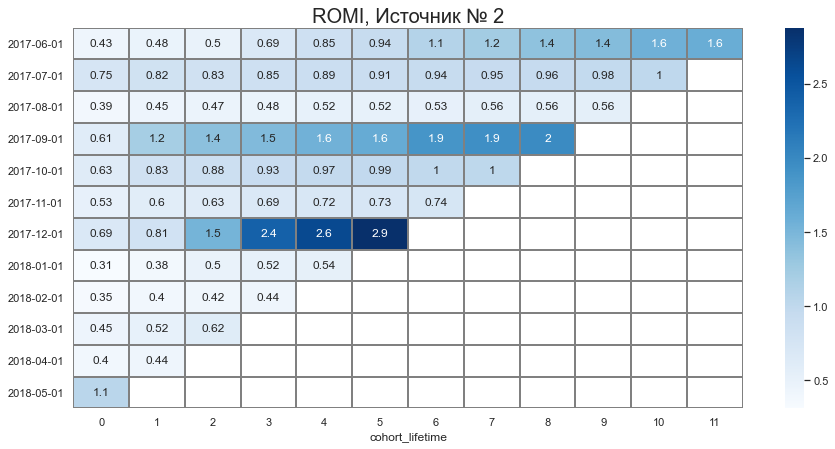

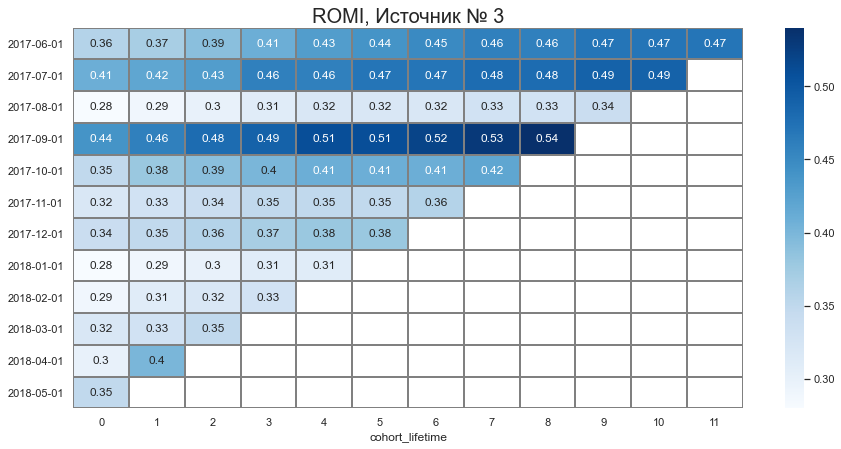

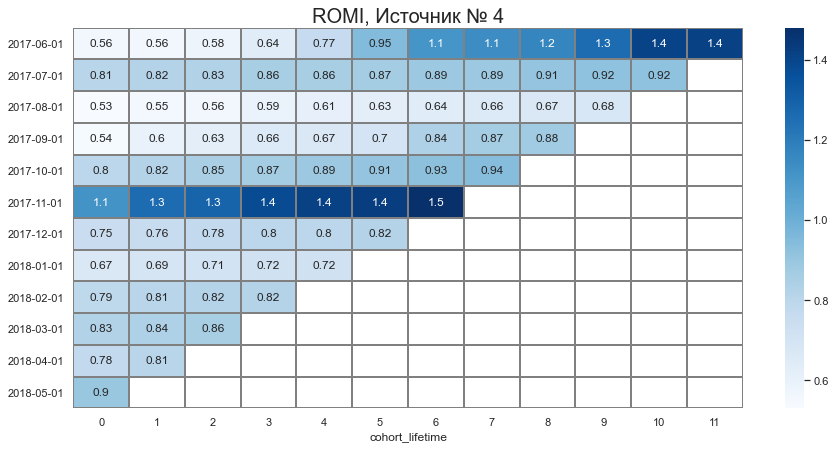

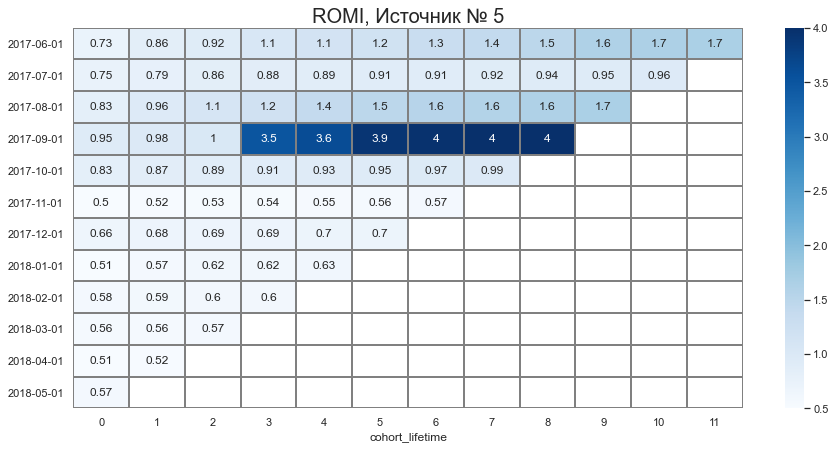

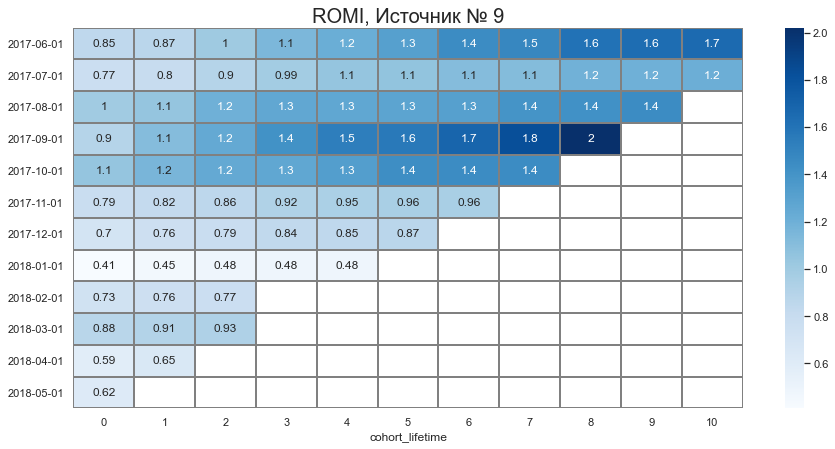

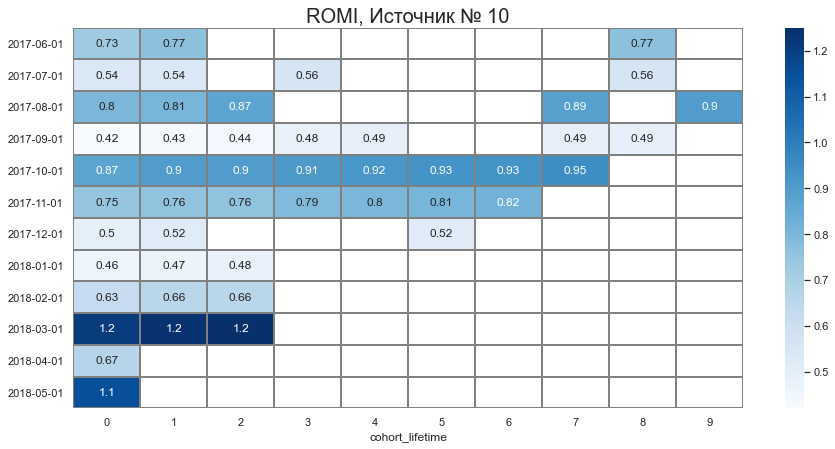

In [89]:
# в переменную romi_num сохранен список номеров источников, со значением ROMI, не равным нулю

romi_num = new_total_orders.groupby('source_id')['romi'].mean().index

# вызов функции осуществлен для источников из вышеуказанного списка

for month in romi_num:
    ROMI(month)

**Вывод:**

Распределение расходов на маркетинг по каждому рекламному источнику показало, что суммарно наиболее дорогим оказался 4й рекламный источник: затраты на него почти вдвое превышают второй после него источник рекламы. Пик затрат пришелся на осенние месяцы 2017 года. Так, ноябрь стал самым затратным на маркетинг месяцем за весь анализируемый период. Это может обуславливать раннее отмеченные приросты посещаемости и среднего чека. 

Однако, если затраты на приобретение клиента слишком высоки, нужно будет изменить маркетинговю стратегию или даже повысить цены. Следует отметить, что стоимость приобретения клиентов имеет решающее значение для всех бизнесов. В исследовательском анализе это отображает метрика САС, которая рассчитывается как частное от деления затрат на рекламу на количество новых пользователей. В целом, только один период имеет значение, превышающее 1.54 у.е. на привлечение одного пользователя - это август 2017 года. 
Самый большой показатель по метрике САС у 3го рекламного источника за весь анализируемый период. Поскольку он не является самым дорогим в аспекте суммарного распределения расходов, можно сделать вывод, что с данного источника пришло недостаточно покупателей. Можно сделать вывод, что необходимо пересмотреть целесообразность привлечения данного рекламного источника.


Когортный анализ по ROMI показал, что по всем рекламным источникам все когорты окупились.
Особо выделяются 3й и 10й источники: у них самый низкий ROMI из всех анализируемых источников. Наиболее впечатляющий ROMI у 1го источника.
Также нужно исключить 6, 7 и 8 источники, так как по когортному анализу явно наблюдается отток пользователей после первого 'месяца' жизни когорт. 

## Выводы и рекомендации

В ходе данной работы были проанализированы данные о посещениях сайта, о всех заказах и рекламных расходах за период с июня 2017 по конец мая 2018 года.

Было выполнено исследование как клиенты пользуются сервисом, когда делают первые покупки на сайте, сколько денег приносит компании каждый клиент, когда расходы на привлечение клиента окупаются. Для этих целей в исследовательском анализе были изучены продуктовые метрики, метрики электронной коммерции, а также маркетинговые метрики.

В результате было выявлено, что приток уникальных пользователей приходился на осень 2017 года, это обусловлено большими рекламными кампаниями, рост затрат на которые произошел в аналогичный период.
В среднем среднее количества сессий пользователей в день составляет 1.08, что означает, что стандартный пользователь заходит на сайт больше 1 раза. 

Когортный анализ показал, что с течением времени коэффициент удержания за полгода упал на 2,3%. Это говорит, о том, что около половины пользователей не очень хотят возвращаться на сайт. Возможно, стоит обратить внимание на оформление сайта или проверить технические аспекты.
Каждая когорта пользователей в первый месяц делает около 1 заказа на человека, но с увеличением 'возраста' конкретной когорты, количество заказов резко возрастает. При анализе 6 месяцев 'жизни' когорт было выявлено, что на 1 пользователя приходится в среднем около 10 заказов. Это означает, что пользователи удовлетворены первым заказом и возвращаются чтобы сделать последующие.

На тепловой карте можно заметить, что метрика LTV возрастает по мере увеличения 'жизни' когорт. Так, пользователи, впервые совершившие покупку в июне 2017 года уже через полгода  стали приностить вдвое больше денег: показатель LTV увеличился с 4.7 до 9.3. Особо стоит отметить когорту пользователей, сделавших покупку в сентябре 2017 года: уже на 3й месяц 'жизни' данной когорты LTV удволся с 5.6 до 11 у.е., что на треть больше чем средне значение по всем когортам за полгода


Когортный анализ по ROMI показал, что по всем рекламным источникам все когорты окупились.
Особо выделяются 3й и 10й источники: у них самый низкий ROMI из всех анализируемых источников. Наиболее впечатляющий ROMI у 1го источника.
Также нужно исключить 6, 7 и 8 источники, так как по когортному анализу явно наблюдается отток пользователей после первого 'месяца' жизни когорт.